# Titanic - Machine Learning from Disaster

# The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Step 0: perpare the env

In [3]:
!pip install -U pandas matplotlib scikit-learn xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 38.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 28.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 11.1 MB/s eta 0:00:0000:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.

## Step 1: Load the data

In [2]:
import pandas as pd
data = pd.read_csv('data/train.csv')
print(data.head())
y = data.pop('Survived')

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Step2: EDA(Exploratory data analysis)
Ignore PassengerId

### Survived

the number of missing value:  0
0    549
1    342
Name: Survived, dtype: int64


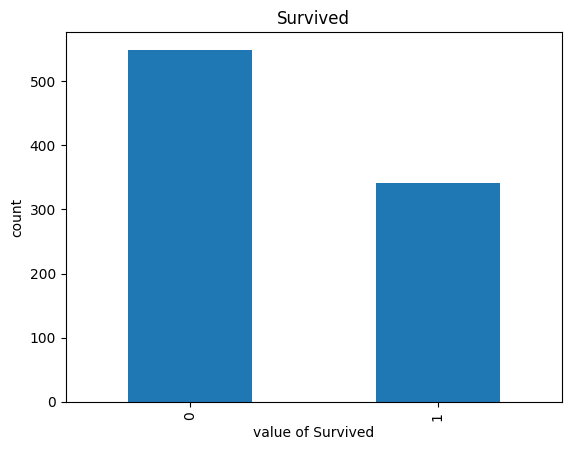

In [4]:
import matplotlib.pyplot as plt
print('the number of missing value: ', sum(y.isna()))
tmp = y.value_counts().sort_index()
print(tmp)
tmp.plot(kind='bar')
plt.title('Survived')
plt.xlabel('value of Survived')
plt.ylabel('count')
plt.show()

### Pclass

the number of missing value:  0
1    216
2    184
3    491
Name: Pclass, dtype: int64


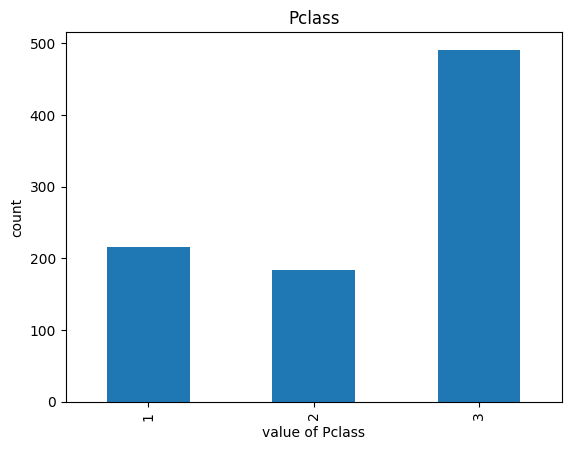

In [5]:
print('the number of missing value: ', sum(data['Pclass'].isna()))
tmp = data['Pclass'].value_counts().sort_index()
print(tmp)
tmp.plot(kind='bar')
plt.title('Pclass')
plt.xlabel('value of Pclass')
plt.ylabel('count')
plt.show()

### Name
do not know what to do

### Sex

the number of missing value:  0
female    314
male      577
Name: Sex, dtype: int64


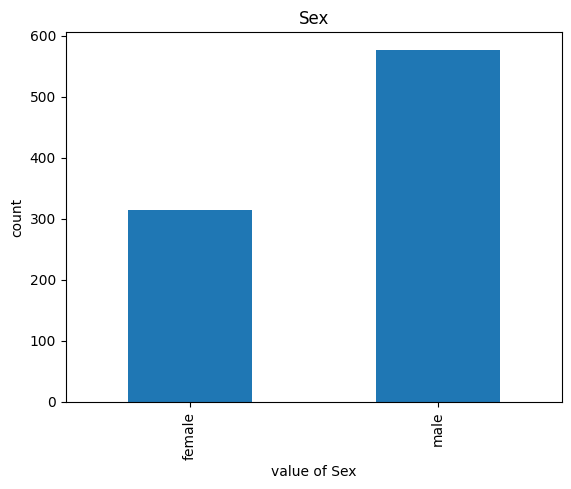

In [6]:
print('the number of missing value: ', sum(data['Sex'].isna()))
tmp = data['Sex'].value_counts().sort_index()
print(tmp)
tmp.plot(kind='bar')
plt.title('Sex')
plt.xlabel('value of Sex')
plt.ylabel('count')
plt.show()

### Age

the number of missing value:  177


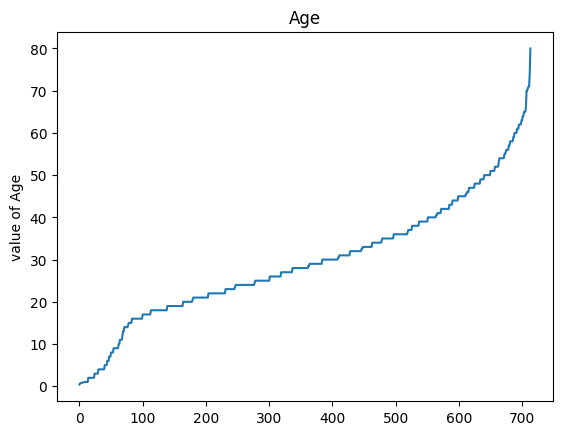

In [7]:
print('the number of missing value: ', sum(data['Age'].isna()))
plt.plot(data['Age'].sort_values().to_list())
plt.title('Age')
plt.ylabel('value of Age')
plt.show()

WARNING: Missing value

thinking: maybe we can use SibSp and Parch to fill the miss value

### SibSp

the number of missing value:  0
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64


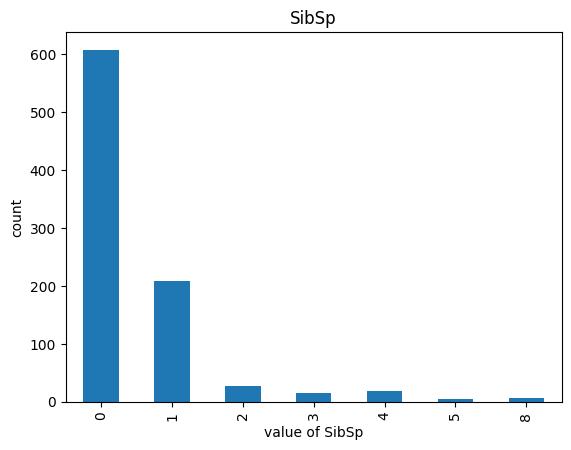

In [8]:
print('the number of missing value: ', sum(data['SibSp'].isna()))
tmp = data['SibSp'].value_counts().sort_index()
print(tmp)
tmp.plot(kind='bar')
plt.title('SibSp')
plt.xlabel('value of SibSp')
plt.ylabel('count')
plt.show()

### Parch

the number of missing value:  0
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64


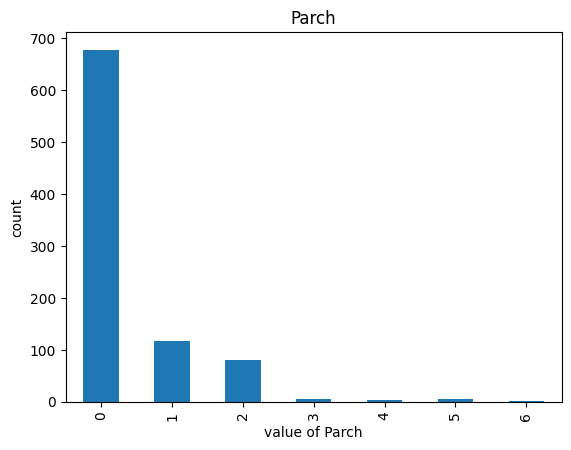

In [9]:
print('the number of missing value: ', sum(data['Parch'].isna()))
tmp = data['Parch'].value_counts().sort_index()
print(tmp)
tmp.plot(kind='bar')
plt.title('Parch')
plt.xlabel('value of Parch')
plt.ylabel('count')
plt.show()

### Ticket
do not know what to do about ticket

do not know the meaning of ticket

### Cabin

the number of missing value:  687
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: Cabin, dtype: int64


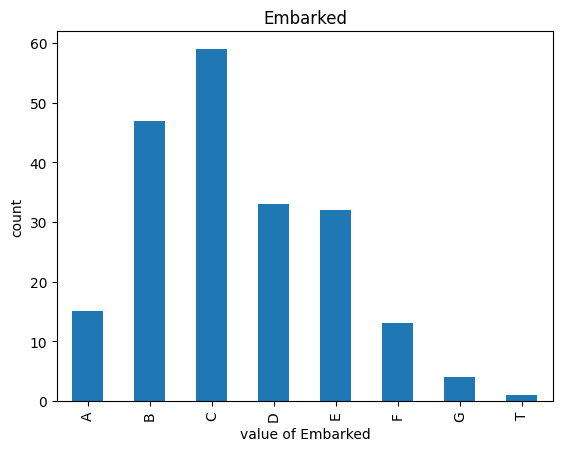

In [10]:
print('the number of missing value: ', sum(data['Cabin'].isna()))
tmp = data['Cabin'].map(arg=lambda x:x[0],na_action='ignore').value_counts().sort_index()
print(tmp)
tmp.plot(kind='bar')
plt.title('Embarked')
plt.xlabel('value of Embarked')
plt.ylabel('count')
plt.show()

WARNING: Missing value

### Embarked

the number of missing value:  2
C    168
Q     77
S    644
Name: Embarked, dtype: int64


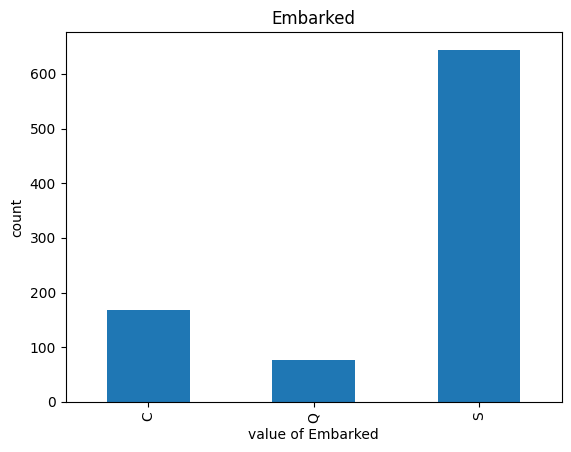

In [11]:
print('the number of missing value: ', sum(data['Embarked'].isna()))
tmp = data['Embarked'].value_counts().sort_index()
print(tmp)
tmp.plot(kind='bar')
plt.title('Embarked')
plt.xlabel('value of Embarked')
plt.ylabel('count')
plt.show()

WARNING: Missing value

## data pre-process

In [12]:
# Age
age_mean = data['Age'].mean()
data['Age'].fillna(value=age_mean, inplace=True )
# Cabin
data['Cabin_a'] = data['Cabin'].map(arg=lambda x:x[0], na_action='ignore')
'''
def cabin_num(x):
    if x.count(' '):
        tmp = x.split()[-1]
    else:
        tmp = x
    return int(tmp[1:])
data['Cabin_n'] = data['Cabin'].map(arg=cabin_num, na_action='ignore')
'''
# Ticket
def ticket_prefix(x):
    if x.count(' '):
        return x.split()[0].replace('.', '').replace('/', '')
data['ticket_prefix'] = data['Ticket'].map(arg=ticket_prefix, na_action='ignore')
'''
def ticket_num(x):
    if x.count(' '):
        return int(x.split()[1])
data['ticket_num'] = data['Ticket'].map(arg=ticket_num, na_action='ignore')
'''
# relatives
data['relatives'] = data['SibSp'] + data['Parch']

print(data.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

  Cabin_a ticket_prefix  relatives  
0     NaN            A5          1  
1       C   

In [13]:
data.drop(labels=['PassengerId','Name','Ticket', 'Cabin'], axis='columns', inplace=True)
data = pd.get_dummies(data)
data.fillna(value=0, inplace=True)

### StandardScaler
Decision Tree doesn't need standard scale and StandardScaler actually reduce the accuracy score.

so StandardScaler is only used for Bechmark(SVM and KNN)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_ft = scaler.fit_transform(data)

### Benchmark

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC()
scores = cross_val_score(clf, data_ft, y, cv=9)
print(scores.mean())
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, data_ft, y, cv=9)
print(scores.mean())

0.797979797979798
0.7699214365881032


### Understanding

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
param_grid = {'criterion':['gini', 'entropy']
             ,'max_depth': [3,4,5,6,7,8,9]
             ,'min_samples_split':[2,3,4,5,6,7,8,9]}
grid_search = GridSearchCV(
    estimator=clf, param_grid=param_grid, scoring='balanced_accuracy', cv=9)
grid_search.fit(data, y)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=6)
clf.fit(data, y)
#plot_tree(clf)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=6)

In [18]:
for i,j in zip(data.columns, clf.feature_importances_):
    print(i,': ', j)

Pclass :  0.13451455790745043
Age :  0.16841554308977105
SibSp :  0.011031727707705783
Parch :  0.007197160865342378
Fare :  0.15226155042408426
relatives :  0.050116589139031935
Sex_female :  0.0
Sex_male :  0.4086442171258165
Embarked_C :  0.009204419036596474
Embarked_Q :  0.0
Embarked_S :  0.006497368319879754
Cabin_a_A :  0.0
Cabin_a_B :  0.0
Cabin_a_C :  0.008537975014388256
Cabin_a_D :  0.007097084258220497
Cabin_a_E :  0.0
Cabin_a_F :  0.0
Cabin_a_G :  0.0
Cabin_a_T :  0.0
ticket_prefix_A4 :  0.0
ticket_prefix_A5 :  0.0
ticket_prefix_AS :  0.0
ticket_prefix_C :  0.0
ticket_prefix_CA :  0.0
ticket_prefix_CASOTON :  0.0
ticket_prefix_FC :  0.0
ticket_prefix_FCC :  0.0
ticket_prefix_Fa :  0.0
ticket_prefix_PC :  0.0
ticket_prefix_PP :  0.0
ticket_prefix_PPP :  0.0
ticket_prefix_SC :  0.0
ticket_prefix_SCA4 :  0.0
ticket_prefix_SCAH :  0.0
ticket_prefix_SCOW :  0.0
ticket_prefix_SCPARIS :  0.0
ticket_prefix_SCParis :  0.0
ticket_prefix_SOC :  0.0
ticket_prefix_SOP :  0.0
ticket_pre

### Voting(Random Forest)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30,max_depth=8)
scores = cross_val_score(rfc, data, y, cv=9)
print(scores.mean())
rfc.fit(data, y)

0.8215488215488215


RandomForestClassifier(max_depth=8, n_estimators=30)

### Gradient Boosting(XGB and GBDT)

In [20]:
from xgboost import XGBClassifier
clf = XGBClassifier()
scores = cross_val_score(clf, data_ft, y, cv=9)
print(scores.mean())
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=90, learning_rate=0.25)
scores = cross_val_score(gbc, data, y, cv=9)
print(scores.mean())
gbc.fit(data,y)

0.8215488215488215
0.8226711560044893


GradientBoostingClassifier(learning_rate=0.25, n_estimators=90)

### Parameter tuning

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
param_grid = {'n_estimators':[70,75,80,85,90,95,100]
             ,'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3,0.35]}

grid_search = GridSearchCV(
    clf, param_grid, scoring='balanced_accuracy', cv=9)
grid_search.fit(data_ft, y)
grid_search.best_params_

{'learning_rate': 0.3, 'n_estimators': 95}